In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,train_test_split
import matplotlib.pyplot as plt


In [12]:
# data path
data = pd.read_csv("D:\ArcGISProjects\syraster\Rtable_result\SY_POINT_MERGES_NVDI.csv")
data

,Unnamed: 0,X,X.1,X.2,X.3,X.4,X.5,Y,Y.1,Y.2,...,Y.4,Y.5,pre_2022_mean_Band_1,tmp_2022_mean_Band_1,SY_ASP_5_Band_1,SY_SLOP_5_Band_1,SY_DEM_5_Band_1,ndvi_2022_Band_1,DLMC,PH
0,1,107.140420,107.140420,107.140420,107.140420,107.140420,107.140420,28.454940,28.454940,28.454940,...,28.454940,28.454940,873.166687,142.083328,311.184540,6.067848,1222.400024,1772.0,旱地,4.78
1,2,107.004920,107.004920,107.004920,107.004920,107.004920,107.004920,28.233230,28.233230,28.233230,...,28.233230,28.233230,837.500000,137.250000,41.932869,11.214284,1240.599976,365.0,旱地,4.34
2,3,107.427614,107.427614,107.427614,107.427614,107.427614,107.427614,28.222543,28.222543,28.222543,...,28.222543,28.222543,857.833313,151.166672,325.007690,6.959332,992.099976,349.0,水田,5.83
3,4,107.063560,107.063560,107.063560,107.063560,107.063560,107.063560,27.856010,27.856010,27.856010,...,27.856010,27.856010,807.666687,157.416672,315.000000,3.237762,908.099976,5329.0,水田,7.30
4,5,107.000850,107.000850,107.000850,107.000850,107.000850,107.000850,28.187500,28.187500,28.187500,...,28.187500,28.187500,820.416687,151.166672,309.806030,17.349291,992.799988,5231.0,旱地,4.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,7489,107.449278,107.449278,107.449278,107.449278,107.449278,107.449278,28.010001,28.010001,28.010001,...,28.010001,28.010001,849.500000,144.666672,341.567383,5.419226,1078.599976,6135.0,设施农用地,6.30
7488,7490,107.452550,107.452550,107.452550,107.452550,107.452550,107.452550,28.054348,28.054348,28.054348,...,28.054348,28.054348,846.750000,150.166672,121.263115,9.301414,911.599976,6393.0,旱地,6.90
7489,7491,107.452868,107.452868,107.452868,107.452868,107.452868,107.452868,28.070184,28.070184,28.070184,...,28.070184,28.070184,843.000000,152.416672,122.242317,21.019365,825.700012,6205.0,水田,7.03
7490,7492,107.453977,107.453977,107.453977,107.453977,107.453977,107.453977,28.088211,28.088211,28.088211,...,28.088211,28.088211,848.250000,151.416672,101.886757,5.544981,877.000000,5952.0,水田,7.25


In [13]:
data.columns

Index(['Unnamed: 0', 'X', 'X.1', 'X.2', 'X.3', 'X.4', 'X.5', 'Y', 'Y.1', 'Y.2',
       'Y.3', 'Y.4', 'Y.5', 'pre_2022_mean_Band_1', 'tmp_2022_mean_Band_1',
       'SY_ASP_5_Band_1', 'SY_SLOP_5_Band_1', 'SY_DEM_5_Band_1',
       'ndvi_2022_Band_1', 'DLMC', 'PH'],
      dtype='object')

In [14]:
data.rename(columns={"pre_2022_mean_Band_1":"pre","tmp_2022_mean_Band_1":"tmp","SY_ASP_5_Band_1":"asp","SY_SLOP_5_Band_1":"slope","SY_DEM_5_Band_1":"dem","ndvi_2022_Band_1":"nvdi","DLMC":"dl"},inplace=True)
data

,Unnamed: 0,X,X.1,X.2,X.3,X.4,X.5,Y,Y.1,Y.2,...,Y.4,Y.5,pre,tmp,asp,slope,dem,nvdi,dl,PH
0,1,107.140420,107.140420,107.140420,107.140420,107.140420,107.140420,28.454940,28.454940,28.454940,...,28.454940,28.454940,873.166687,142.083328,311.184540,6.067848,1222.400024,1772.0,旱地,4.78
1,2,107.004920,107.004920,107.004920,107.004920,107.004920,107.004920,28.233230,28.233230,28.233230,...,28.233230,28.233230,837.500000,137.250000,41.932869,11.214284,1240.599976,365.0,旱地,4.34
2,3,107.427614,107.427614,107.427614,107.427614,107.427614,107.427614,28.222543,28.222543,28.222543,...,28.222543,28.222543,857.833313,151.166672,325.007690,6.959332,992.099976,349.0,水田,5.83
3,4,107.063560,107.063560,107.063560,107.063560,107.063560,107.063560,27.856010,27.856010,27.856010,...,27.856010,27.856010,807.666687,157.416672,315.000000,3.237762,908.099976,5329.0,水田,7.30
4,5,107.000850,107.000850,107.000850,107.000850,107.000850,107.000850,28.187500,28.187500,28.187500,...,28.187500,28.187500,820.416687,151.166672,309.806030,17.349291,992.799988,5231.0,旱地,4.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,7489,107.449278,107.449278,107.449278,107.449278,107.449278,107.449278,28.010001,28.010001,28.010001,...,28.010001,28.010001,849.500000,144.666672,341.567383,5.419226,1078.599976,6135.0,设施农用地,6.30
7488,7490,107.452550,107.452550,107.452550,107.452550,107.452550,107.452550,28.054348,28.054348,28.054348,...,28.054348,28.054348,846.750000,150.166672,121.263115,9.301414,911.599976,6393.0,旱地,6.90
7489,7491,107.452868,107.452868,107.452868,107.452868,107.452868,107.452868,28.070184,28.070184,28.070184,...,28.070184,28.070184,843.000000,152.416672,122.242317,21.019365,825.700012,6205.0,水田,7.03
7490,7492,107.453977,107.453977,107.453977,107.453977,107.453977,107.453977,28.088211,28.088211,28.088211,...,28.088211,28.088211,848.250000,151.416672,101.886757,5.544981,877.000000,5952.0,水田,7.25


In [16]:
# 划分数据
le =LabelEncoder()
data['dl'] = le.fit_transform(data['dl'])

X = data[['X','Y','pre','tmp','asp','slope','dem','dl','nvdi']]

y = data['PH']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X,y

(               X          Y         pre         tmp         asp      slope  \
 0     107.140420  28.454940  873.166687  142.083328  311.184540   6.067848   
 1     107.004920  28.233230  837.500000  137.250000   41.932869  11.214284   
 2     107.427614  28.222543  857.833313  151.166672  325.007690   6.959332   
 3     107.063560  27.856010  807.666687  157.416672  315.000000   3.237762   
 4     107.000850  28.187500  820.416687  151.166672  309.806030  17.349291   
 ...          ...        ...         ...         ...         ...        ...   
 7487  107.449278  28.010001  849.500000  144.666672  341.567383   5.419226   
 7488  107.452550  28.054348  846.750000  150.166672  121.263115   9.301414   
 7489  107.452868  28.070184  843.000000  152.416672  122.242317  21.019365   
 7490  107.453977  28.088211  848.250000  151.416672  101.886757   5.544981   
 7491  107.439513  28.059979  840.000000  153.333328  310.913727   8.467508   
 
               dem  dl    nvdi  
 0     1222.40002

In [17]:
# 设置树的数目范围
n_estimators_range = range(100, 1000, 100)
cv_scores = []

# 使用交叉验证
for n_estimators in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    #scores = cross_val_score(rf, X, y, cv=5, scoring='r2')  # 5折交叉验证
    scores = cross_val_score(rf,X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # 5折交叉验证
    cv_scores.append(scores.mean())

# 绘制交叉验证得分图
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Accuracy')
# plt.savefig('target.png') # 保存图片
plt.show()

# 选择最优数量的树
optimal_n_estimators = n_estimators_range[cv_scores.index(max(cv_scores))]
print("The optimal number of trees is {}".format(optimal_n_estimators))

In [20]:
# 初始化和训练随机森林模型
rf = RandomForestRegressor(n_estimators=700, random_state=42)
rf.fit(X_train,y_train)
# 在训练集上预测

train_preds = rf.predict(X_train)

# 计算训练集的RMSE,r2

train_rmse = mean_squared_error(y_train, train_preds, squared=False)

train_r2 = r2_score(y_train,train_preds)
print(f'Train RMSE: {train_rmse:.4f},Train R2: {train_r2:.4f}')

Train RMSE: 0.2985,Train R2: 0.9004


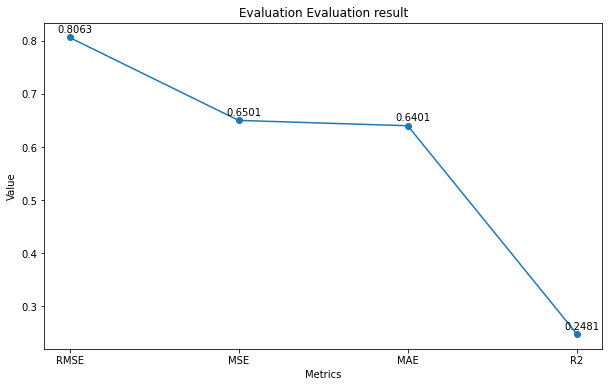

In [39]:
# 计算测试集的RMSE,r2
test_preds = rf.predict(X_test)
test_rmse = mean_squared_error(y_test,test_preds,squared=False)
test_mse = mean_squared_error(y_test,test_preds)
test_mae = mean_absolute_error(y_test,test_preds)
test_r2 = r2_score(y_test,test_preds)

labels = ['RMSE','MSE','MAE','R2']
values = [test_rmse,test_mse,test_mae,test_r2]
plt.figure(figsize=(10,6))
plt.plot(labels, values, marker='o')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Evaluation result')
# 在每个点上添加文本标签
for i in range(len(labels)):
    plt.annotate(f'{values[i]:.4f}', xy=(labels[i], values[i]), xytext=(5, 5), textcoords='offset points', ha='center')

plt.show()
plt.show()


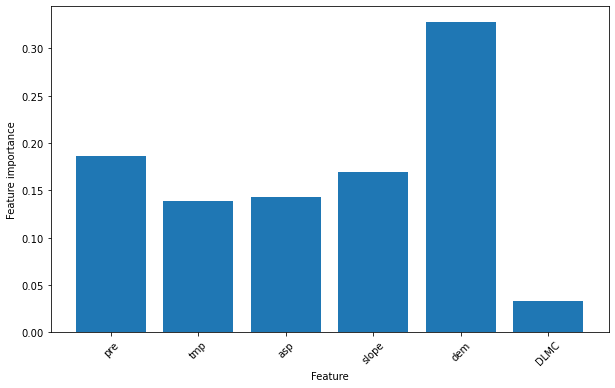

In [34]:
import matplotlib.pyplot as plt
importance = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
plt.bar(range(len(features)), importance, align='center')
plt.xticks(np.arange(len(features)), features, rotation = 45)
plt.ylabel("Feature importance")
plt.xlabel("Feature")
plt.show()

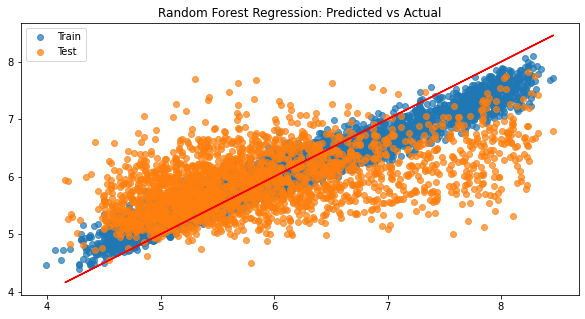

In [35]:
# 在训练集和测试集上的预测值

train_preds = rf.predict(X_train)

test_preds = rf.predict(X_test)



plt.figure(figsize=(10,5))



# 画出训练集的散点图

plt.scatter(y_train, train_preds, label='Train', alpha=.7)

# 画出测试集的散点图

plt.scatter(y_test, test_preds, label='Test', alpha=.7)

# 画出y=x线
plt.plot(y_test, y_test, color='red')



plt.legend()

plt.title('Random Forest Regression: Predicted vs Actual')

plt.show()